In [1]:
%load_ext autoreload
%autoreload 2

# Link to the dataset

https://www.kaggle.com/datasets/ironwolf437/who-covid-19-cases-dataset

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('WHO COVID-19 cases.csv')

In [5]:
df.isnull().sum()

Date_reported            0
Country_code           244
Country                  0
Continent                0
WHO_region            4392
New_cases            19300
Cumulative_cases         0
New_deaths           33476
Cumulative_deaths        0
dtype: int64

In [9]:
df['New_deaths'].fillna(0, inplace=True)
df['New_cases'].fillna(0, inplace=True)

In [27]:
df[df['Country'] == 'Afghanistan']['New_cases'].sum(), df[df['Country'] == 'Afghanistan']['Cumulative_cases'].max()

(235214.0, 235214)

In [12]:
len(df['Country'].unique())

240

# Time series plot for new cases

In [46]:
def track_cases_by_country(df, country: str):
    df_country = df[df['Country'] == country]

    df_country.plot(x='Date_reported', y='Cumulative_cases')
    plt.title(country)

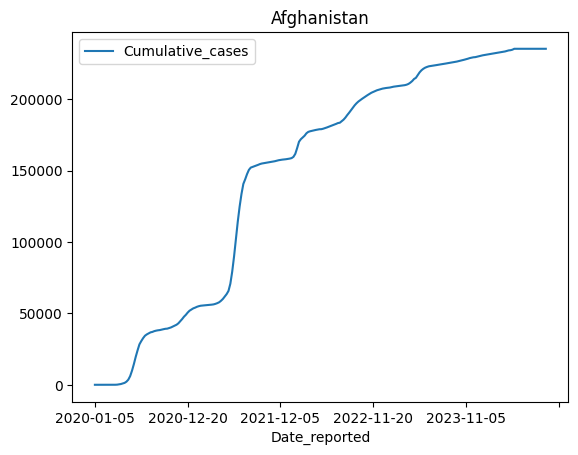

In [19]:
track_cases_by_country(df, 'Afghanistan')

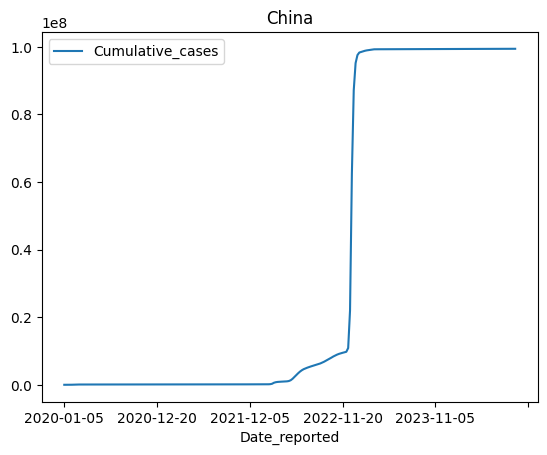

In [20]:
track_cases_by_country(df, 'China')

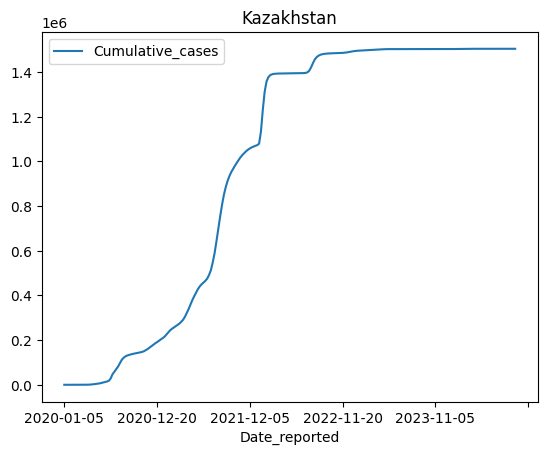

In [24]:
track_cases_by_country(df, 'Kazakhstan')

# Time series plot for new deaths

In [47]:
def track_deaths_by_country(df, country: str):
    df_country = df[df['Country'] == country]

    df_country.plot(x='Date_reported', y='Cumulative_deaths', color='red')
    plt.title(country)

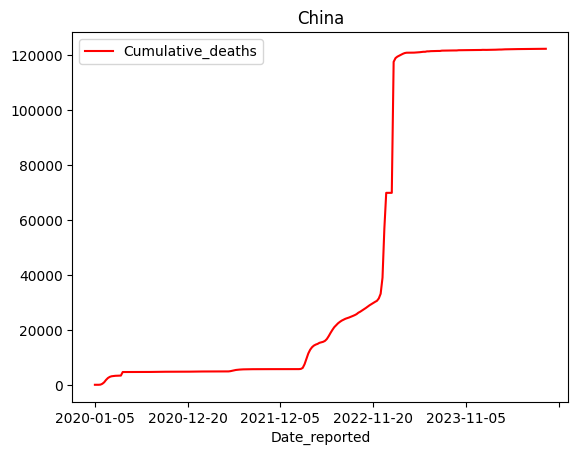

In [49]:
track_deaths_by_country(df, 'China')

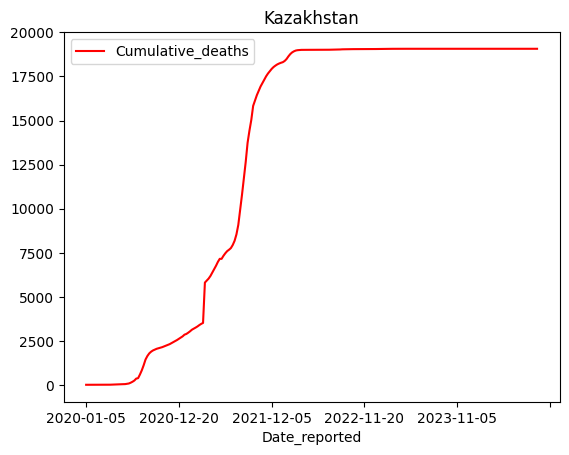

In [50]:
track_deaths_by_country(df, 'Kazakhstan')

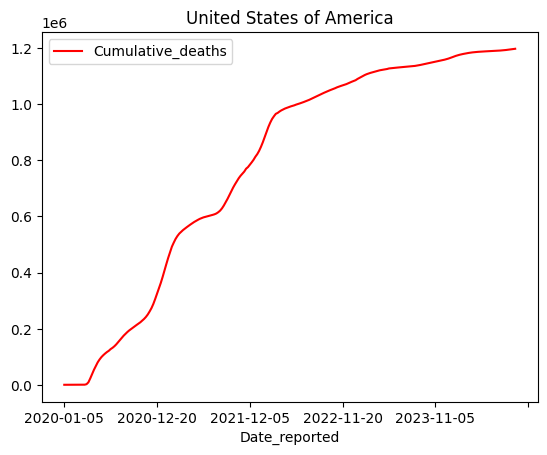

In [51]:
track_deaths_by_country(df, 'United States of America')

### Top 10 countries by reported cases

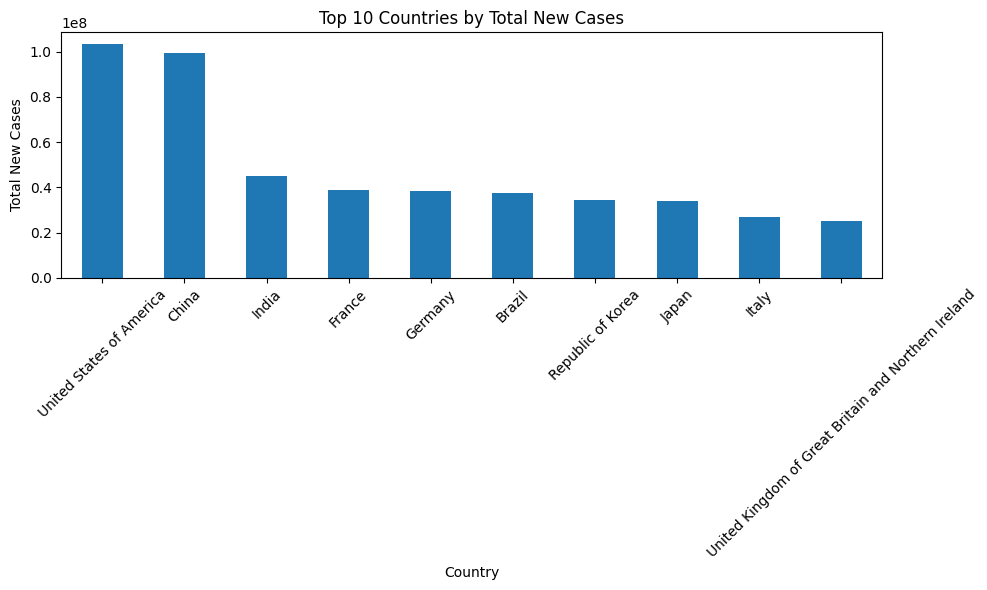

In [41]:
top_countries_by_reported_cases = df.groupby('Country')['New_cases'].sum().sort_values(ascending=False)[:10]
plt.figure(figsize=(10, 6))
top_countries_by_reported_cases.plot(kind='bar')
plt.title('Top 10 Countries by Total New Cases')
plt.xlabel('Country')
plt.ylabel('Total New Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Top 10 countries by deaths

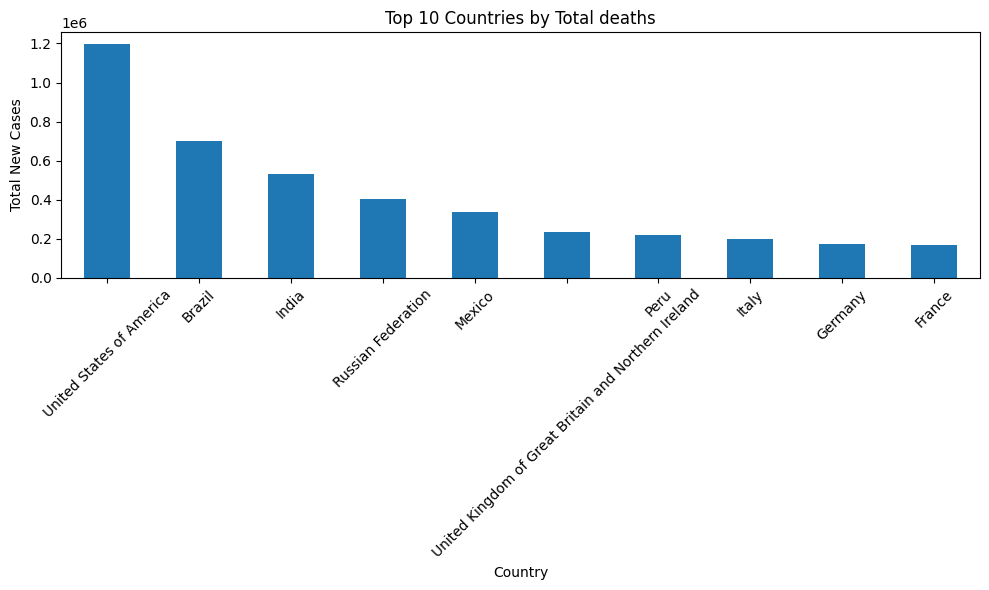

In [43]:
top_countries_by_deaths_cases = df.groupby('Country')['New_deaths'].sum().sort_values(ascending=False)[:10]
plt.figure(figsize=(10, 6))
top_countries_by_deaths_cases.plot(kind='bar')
plt.title('Top 10 Countries by Total deaths')
plt.xlabel('Country')
plt.ylabel('Total New Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Let's check how much time does it take for the first person to die countrywise

In [74]:
def time_difference_between_first_case_and_death(df, country, threshold = 1000):
    df_country = df[df['Country'] == country]

    first_nonzero_case = df_country[df_country['Cumulative_cases'] > threshold].iloc[0]
    first_nonzero_death = df_country[df_country['Cumulative_deaths'] > threshold].iloc[0]

    first_nonzero_date_case = first_nonzero_case['Date_reported']
    first_nonzero_date_death = first_nonzero_death['Date_reported']

    print(first_nonzero_date_case, first_nonzero_date_death)

In [75]:
time_difference_between_first_case_and_death(df, 'Kazakhstan')

2020-04-19 2020-08-09


In [76]:
time_difference_between_first_case_and_death(df, 'China')

2020-01-26 2020-02-16


In [77]:
time_difference_between_first_case_and_death(df, 'United States of America')

2020-03-15 2020-03-29
